# Introduction to Financial Engineering [IE471]
##  Hands-on Practice on Financial AI Session #2

In [3]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from textblob import TextBlob
%matplotlib inline
import seaborn as sns


In [4]:
# Read in and preview 'cleaned_data.csv'
tweets = pd.read_csv('data/cleaned_data.csv', lineterminator='\n') # fix problem thank to 'lineterminator'
tweets = tweets.iloc[:, [0, 1, 4]]
tweets.head()

,id,date,cleaned_tweet
0,1212423892784078848,2020-01-02,pick decade roku roku tradedesk ttd alteryex a...
1,1212388005337395200,2020-01-02,recent earnings uarter beat earnings revenue ...
2,1212327513906499584,2020-01-01,enters uptrend momentum indicator exceed leve...
3,1212295019937378305,2020-01-01,benchmark boost price target
4,1212285745848827905,2020-01-01,buy stock rebound demand come analyst say bar...


In [5]:
# Look at nvida_tweets data types

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49437 entries, 0 to 49436
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             49437 non-null  int64 
 1   date           49437 non-null  object
 2   cleaned_tweet  49208 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [6]:
# Convert date_time column into datetime stamp

tweets.date = pd.to_datetime(tweets.date)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49437 entries, 0 to 49436
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             49437 non-null  int64         
 1   date           49437 non-null  datetime64[ns]
 2   cleaned_tweet  49208 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
# Check for null values

tweets.isnull().sum()

id                 0
date               0
cleaned_tweet    229
dtype: int64

In [8]:
# Drop null values

tweets = tweets.dropna()

### 1. Calculate Sentiment Score with TextBlob

In [9]:
# Use TextBlob to get sentiment scores

tweets['sentiment'] = tweets.apply(lambda row: TextBlob(row.cleaned_tweet).sentiment[0], axis=1)
tweets.head()

,id,date,cleaned_tweet,sentiment
0,1212423892784078848,2020-01-02,pick decade roku roku tradedesk ttd alteryex a...,0.0
1,1212388005337395200,2020-01-02,recent earnings uarter beat earnings revenue ...,0.0
2,1212327513906499584,2020-01-01,enters uptrend momentum indicator exceed leve...,0.0
3,1212295019937378305,2020-01-01,benchmark boost price target,0.0
4,1212285745848827905,2020-01-01,buy stock rebound demand come analyst say bar...,0.0


In [10]:
# Preview how sentiment scores differ on different tweets

pd.options.display.max_colwidth = 300
random_subset = tweets.sample(n=10)
random_subset = random_subset.drop(columns=['id', 'date'])
random_subset.rename(columns={'tweet':'Original Tweet'})
random_subset = random_subset.rename(columns={'tweet': 'Original Tweet', 'cleaned_tweet': 'Cleaned Tweet', 'sentiment':'TextBlob Sentiment'})
random_subset.head(10)

,Cleaned Tweet,TextBlob Sentiment
30408,nuevos ximos hist rico,0.00
34341,dgx station offer researcher ai data center box,-0.10
27151,name john dabiri board director,0.00
17225,day move average crossed day move average november view odds indicator,-0.15
13958,surgi como una de la empresas de chip de alto rendimiento durante esta crisis sanitarium global esta es una de tres acciones seguir en,0.00
17265,aapl apple stock amp stock huge explosion ahead boom bust aapl apple,0.40
8417,option maxpain chart open interest chart update optionstrading optionsflow optionstrade optiontrading stock stock stockmarket investment invest invest investor investor uoa,0.00
22935,corporation management present deutsche bank virtual technology conference transcript,0.00
12823,post huge earnings beat next,0.20
42641,option maxpain chart open interest chart update optionstrading optionsflow optionstrade optiontrading stock stock stockmarket investment invest invest investor investor uoa,0.00


In [11]:
tweets.shape

(49208, 4)

### 2. Frequency Analysis

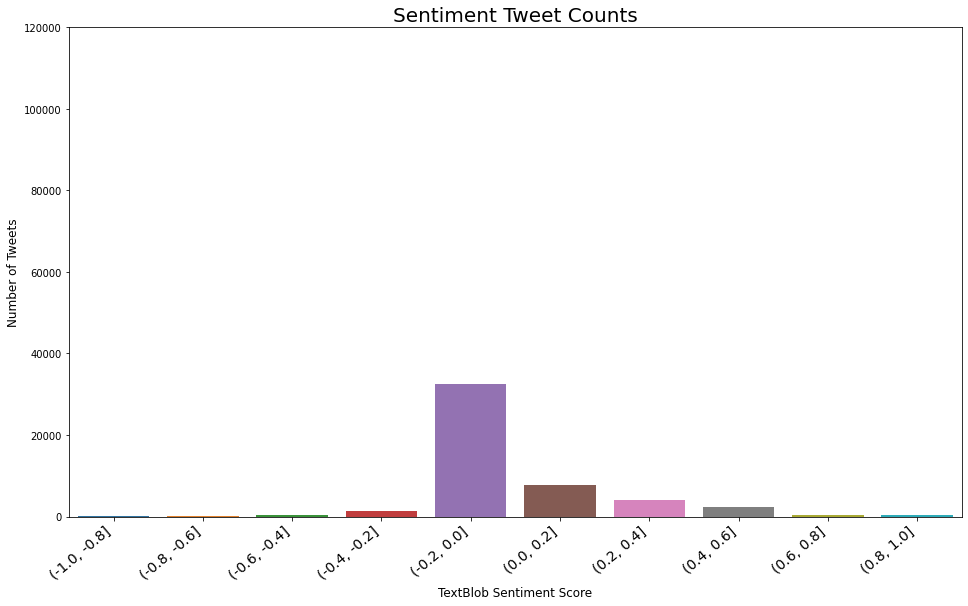

In [12]:
# View count of tweets for binned sentiment

bins = [-1.0, -0.8, -0.6, -.4, -.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
tweets['binned'] = pd.cut(tweets['sentiment'], bins)
plt.figure(figsize=(16,9))
ax = sns.countplot(x=tweets['binned'])
ax.set_ylabel('Number of Tweets', fontsize=12)
ax.set_xlabel('TextBlob Sentiment Score', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=14)
ax.set_title("Sentiment Tweet Counts", fontsize=20)
ax.set_ylim(0, 120000)
plt.show()

### 3. Calculate Daily Sentiment

In [13]:
daily_sentiment = tweets[['date', 'sentiment']]
daily_sentiment.head()

,date,sentiment
0,2020-01-02,0.0
1,2020-01-02,0.0
2,2020-01-01,0.0
3,2020-01-01,0.0
4,2020-01-01,0.0


In [14]:
daily_sentiment = daily_sentiment.resample('D', on='date').mean()
daily_sentiment.head()

,sentiment
date,
2020-01-01,-0.031250
2020-01-02,0.085606
2020-01-03,0.066609
2020-01-04,0.054167
2020-01-05,-0.004167


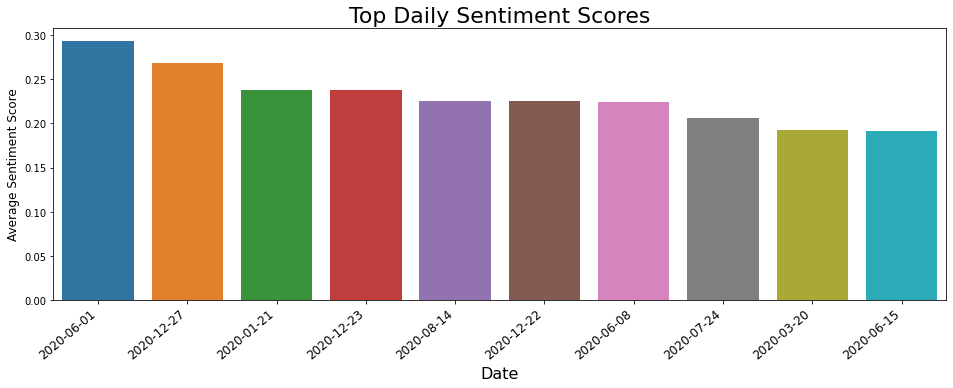

In [15]:
# Find the days with the highest sentiment_2

freq_df = daily_sentiment.nlargest(columns="sentiment", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment'])
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title('Top Daily Sentiment Scores', fontsize=22)
plt.show()

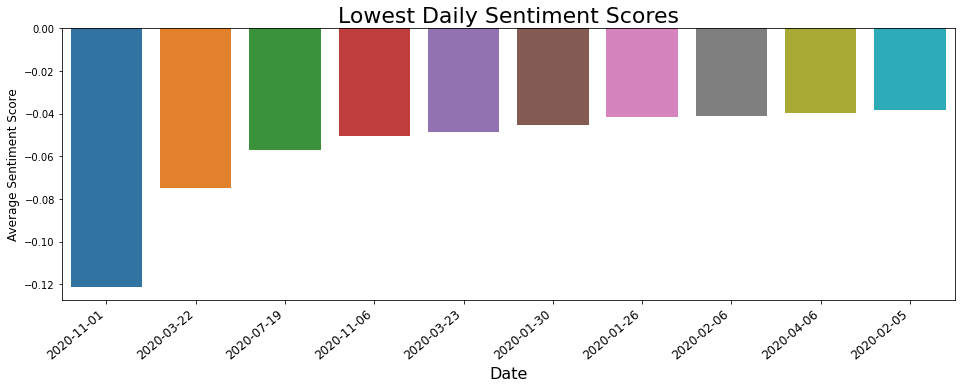

In [16]:
freq_df = daily_sentiment.nsmallest(columns="sentiment", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment'])
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title('Lowest Daily Sentiment Scores', fontsize=22)

plt.show()

### 4. Remove Tweets with Sentiment Scores of 0

In [17]:
remove_s1_0 = tweets.copy()
remove_s1_0.head()

,id,date,cleaned_tweet,sentiment,binned
0,1212423892784078848,2020-01-02,pick decade roku roku tradedesk ttd alteryex ayx mongodb mdb datadog ddog shopify shop twilo twlo pagerduty pd suare s workday wday paypal pypl fingures cross,0.0,"(-0.2, 0.0]"
1,1212388005337395200,2020-01-02,recent earnings uarter beat earnings revenue check uick video stock,0.0,"(-0.2, 0.0]"
2,1212327513906499584,2020-01-01,enters uptrend momentum indicator exceed level december view odds indicator,0.0,"(-0.2, 0.0]"
3,1212295019937378305,2020-01-01,benchmark boost price target,0.0,"(-0.2, 0.0]"
4,1212285745848827905,2020-01-01,buy stock rebound demand come analyst say barron,0.0,"(-0.2, 0.0]"


In [18]:
# Check how many tweets had sentiment scores of 0
print('There are ' + str((remove_s1_0.sentiment == 0).sum()) + ' tweets with a Sentiment Score of 0')

There are 27805 tweets with a Sentiment Score of 0


In [19]:
# Remove tweets with 0 for sentiment_2 scores
remove_0 = tweets.copy()
remove_0 = remove_0.rename(columns={'sentiment':'s_no_0'})
remove_0 = remove_0[remove_0.s_no_0 != 0]
(remove_0.s_no_0 == 0).sum()

0

In [20]:
remove_0 = remove_0.groupby(['date'], as_index = False).mean()

In [21]:
# Check that there are no null values

remove_0.isnull().sum()

date      0
id        0
s_no_0    0
dtype: int64

In [22]:
# Add updated columns back to early_tweets dataframe
daily_sentiment['sentiment_final'] = remove_0.s_no_0.values
daily_sentiment.head()

,sentiment,sentiment_final
date,,
2020-01-01,-0.031250,-0.125000
2020-01-02,0.085606,0.273939
2020-01-03,0.066609,0.124337
2020-01-04,0.054167,0.216667
2020-01-05,-0.004167,-0.025000


### 5. Save Sentiment Analysis Results

In [23]:
daily_sentiment.to_csv('data/daily_sentiment_scores.csv')